# <span style="font-size: 30pt; color: blue;"> Analysis of Titanic dataset </span>


# <span style="font-size: 15pt; color:blue;"> Benjamin STAHL</span>

QUESTION : Predict the survival of passengers on the Titanic based on their age, sex, class, and other features? Use the Titanic dataset, which contains information about passengers on the Titanic, and apply logistic regression to predict survival.

# <span style="font-size: 22pt; color:green;"> I. Import of the different librairies  </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition, datasets

# <span style="font-size: 22pt; color:green;"> II. Exploratory Titanic data analysis  </span>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.tail()

PassengerId  Survived  Pclass                                      Name   
886          887         0       2                     Montvila, Rev. Juozas  \
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp   
count   891.000000  891.000000  891.000000  714.000000  891.000000  \
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
print(train.keys())
print(test.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# <span style="font-size: 22pt; color:green;"> III. Clean/remove data if is needed</span>

In [8]:
print("For train\n",train.isnull().sum(),"\n")
print("For test\n",test.isnull().sum(),"\n")

For train
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

For test
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



The cabin and the ticket are not important for the survival of the passengers because the whole ship sank... So :

In [9]:
train.drop(labels = ["Cabin", "Ticket"], axis=1, inplace = True)
test.drop(labels = ["Cabin", "Ticket"], axis=1, inplace = True)

Now we will look at the age distribution of the people whose ages we know. 

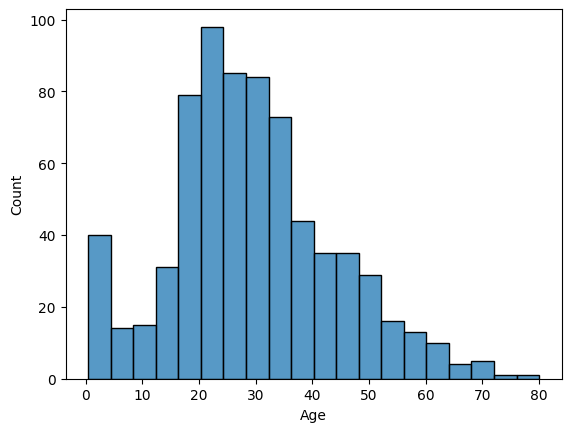

In [10]:
age_distrib= train.copy()
age_distrib.dropna(inplace = True)
sns.histplot(age_distrib["Age"]);

Now we replace the missing values !

In [11]:
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True) 
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)
print("For train\n",train.isnull().sum(),"\n")
print("For test\n",test.isnull().sum(),"\n")

For train
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64 

For test
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64 



Here "Sex" and "Enbarked" are note numerical so we need to encoding categorical variables

In [12]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Here are some graphs representing survival according to certain criteria:

With "Sex":

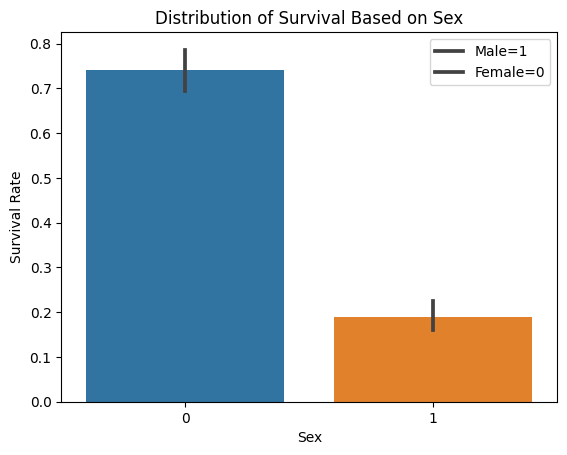

In [13]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Sex")
plt.legend(labels=["Male=1", "Female=0"])
plt.show()

With "Embarked":

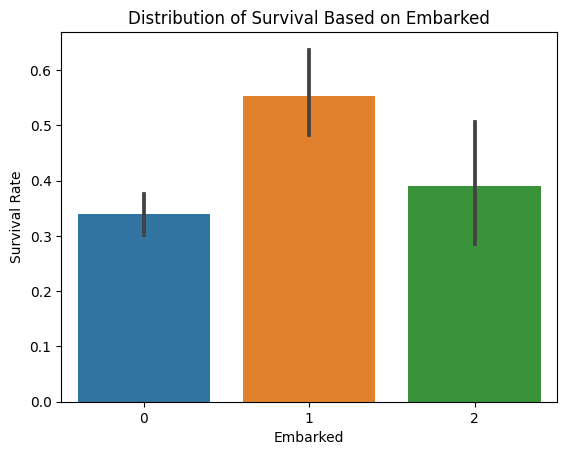

In [14]:
sns.barplot(x="Embarked", y="Survived", data=train)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Embarked")
plt.show()

With "Class" and "Sex" :

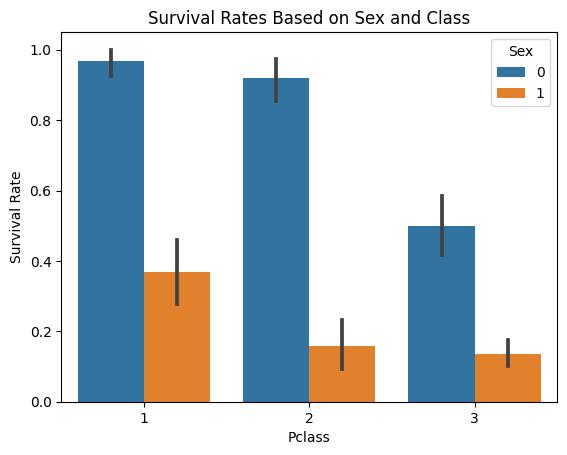

In [15]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Sex and Class");

We are now create a column family :

In [16]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1

# <span style="font-size: 22pt; color:green;"> IV. Creation of the Model  </span>

In [17]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "Family",]
X_train = train[features] 
y_train = train["Survived"] 
X_test = test[features]

We are going to use the validation data set to test the general accuracy of our model.

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Now we do the Logistic Regression model :

In [19]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
pred=logreg.predict(X_valid)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [21]:
rep_log=classification_report(y_valid,pred)
print("The accuracy score is : ",accuracy_score(y_valid, pred))
print("Here is the classification :\n",rep_log)

The accuracy score is :  0.8156424581005587
Here is the classification :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



Here we do the confusion matrice for this model

In [22]:
conf_mat=confusion_matrix(y_valid,pred)

In [23]:
print(conf_mat)

[[94 16]
 [17 52]]


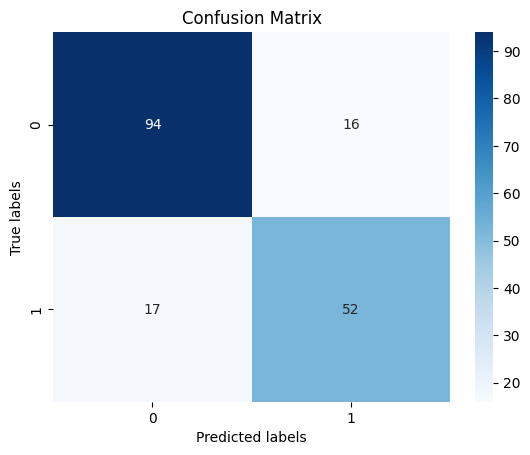

In [24]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()